kaggle running competetion on titanic survival. I analysed this data with personal interest to find answers to some of my questions (not really competetion oriented)
"https://www.kaggle.com/c/titanic" 

## Here are my questions and I will try to find answers 
1. Does Survival has connection to any other attribute (Passenger Class, Gender, Age, fare range, cabin vs non-cabin) ? If there is any correlation, the next should be to find if there is any reason for it (not in scope here).

2. Are there any minors on board with no parent or adult sibling? If available, need an investigation, How could they get on ship with no adult accompany? Though some children might have travelled with nanny, I would still prefer to investigate and find conclusion. (not sure what rules in 1912!, but I will just try this)

3. This is the question raises in my brain after every tragedy! How many on board with children? The rate of only parents survival, only children survival, both survival. If only children survived, I would like to talk to them to find if their parents did sacrifice(ex: one space left in life boat) or they are split apart in chaos!! I would also like talk to only parent survival to find what made them left children behind and they crossed disaster.

**I will use Python with Numpy and Pandas**

*Read data and check attributes and quantity to see if we need munging or imputation*

In [2]:
# Read CSV file and check if any columns are missing data
import numpy as np
import pandas as pd

#train.csv was downloaded from kaggle
titanic = pd.read_csv('train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


***I see age is missing for 177 out of 891, that is 20% of passengers. Let's see some numbers what group of people missing age. ***

In [6]:
# Calculate percentages of groups with Age missing information
print '--------- By Class -------------'
print titanic.loc[titanic['Age'].isnull()].groupby('Pclass')['PassengerId'].count() / titanic.groupby('Pclass')['PassengerId'].count() * 100 
print '--------- By Gender ------------'
print titanic.loc[titanic['Age'].isnull()].groupby('Sex')['PassengerId'].count() / titanic.groupby('Sex')['PassengerId'].count() * 100
print '--------- By Boarding St. ------------'
print titanic.loc[titanic['Age'].isnull()].groupby('Embarked')['PassengerId'].count() / titanic.groupby('Embarked')['PassengerId'].count() *100

--------- By Class -------------
Pclass
1    13.888889
2     5.978261
3    27.698574
Name: PassengerId, dtype: float64
--------- By Gender ------------
Sex
female    16.878981
male      21.490468
Name: PassengerId, dtype: float64
--------- By Boarding St. ------------
Embarked
C    22.619048
Q    63.636364
S    13.975155
Name: PassengerId, dtype: float64


**Boarding station Q has not captured age for 63% of people. Regulators should warn this station to capture information of passengers (I assume people can register for travel only at boarding stations in 1912).**

*I am not building algorithm to estimate age for missing one, I will just replace unknown age with 999 for futher analysis*

In [38]:
#replace unknown age with 999 to avoid NaN errors later
titanic['Age'] = titanic['Age'].fillna(999)

# Question 1:
Does Survival has connection to any other attribute (Passenger Class, Gender, Age etc)?

Total Survival Percentage:  38
   Pclass  Survived  passengers  passenger_class_total       perc
0       1         0          80                    216  37.037037
1       1         1         136                    216  62.962963
2       2         0          97                    184  52.717391
3       2         1          87                    184  47.282609
4       3         0         372                    491  75.763747
5       3         1         119                    491  24.236253


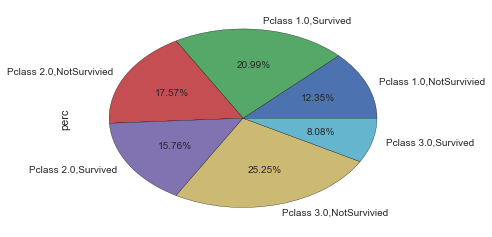

      Sex  Survived  passengers  passenger_class_total       perc
0  female         0          81                    314  25.796178
1  female         1         233                    314  74.203822
2    male         0         468                    577  81.109185
3    male         1         109                    577  18.890815


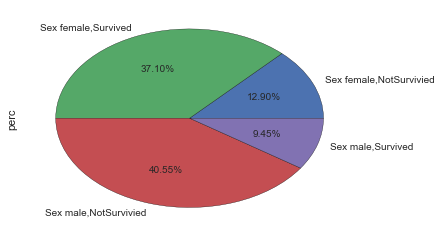

In [22]:
#Calculate survival rate for each column 
#this functions takes column name and group data by that column and produce survival and non-survival percentage 
def survival_by_group(category):
    #Survival(non) count by category
    group_class = pd.DataFrame(titanic.groupby([category, 'Survived'])['PassengerId'].count()).reset_index()
    #rename column with count to passengers
    group_class.rename(columns={'PassengerId' : 'passengers'}, inplace=True)
    
    #Total number of passengers for each category on board
    class_sum = pd.DataFrame(group_class.groupby([category])['passengers'].sum()).reset_index()
    class_sum.rename(columns={'passengers' : 'passenger_class_total'}, inplace=True)
    
    #Merge above two DFs to calculate percentage (surivival(non)-Category / Total-category )
    group_by_class = pd.merge(group_class, class_sum, how='left', on=category)
    group_by_class['perc'] = group_by_class['passengers']*100/group_by_class['passenger_class_total']
    print group_by_class
    %matplotlib inline
    # build labels for pie chart
    labels = []
    for i in range(len(group_by_class)):
        if group_by_class.loc[i]['Survived'] == 1:
            surv = 'Survived'
        else:
            surv = 'NotSurvivied'
        labels.append(category+' '+str(group_by_class.loc[i][category])+','+surv)
    group_by_class['perc'].plot(kind='pie', subplots=True, labels=labels, autopct = '%.2f%%')
    plt.show()

print 'Total Survival Percentage: ',titanic['Survived'].sum()*100/len(titanic)
survival_by_group('Pclass')
survival_by_group('Sex')



I can see 75% of passengers in class-3 didn't survive. This is higher margin comparing to other classes or total surival rate. If 3rd class has low chance of survival, we have to find reasons, example: where were these people located on cruise? Are these belong to economy class and that is located in lower level, so they couldn't reach life boats? And total number of passengers in 3rd class is too high, so they couldn't come out of their cabins quickly? Cruise architecture designs might depend on answers to these quesions. (Ofcourse, we are not getting these answers in our data)

Here is most interesting thing..It seems female survival rate is too high compare to men. As shown in movie, Leonardo sacrifices for his girlfriend Kate, is this case with many people? :-) I am just kidding. Anyway this factor is little interesting to research further on data if most of the females have spouse or brother or father, if they do, it migth be interesting to know how many of them survived with their male company, and what made others survived leaving male in tragedy. I will just stop here on this part.

We could run hypothesis test to proove results we observe (I am not doing it here :-))


### Let's try draw some results by Age

In [15]:
#Add age group coulm to titanic, values 0=0-9 1=10-19, 2=20-29 etc
def age_group(age):
    if age <= 10:
        return '0~10'
    if age <= 20:
        return '11~20'
    if age <= 30:
        return '21~30'
    if age <= 40:
        return '31~40'
    if age <= 50:
        return '41~50'
    if age <= 60:
        return '51~60'
    if age <= 70:
        return '61~70'
    if age <= 80:
        return '71~80'
    if age <= 90:
        return '81~90'
    if age <= 100:
        return '91~100'
    else:
        return 'UNKNOWN'
      
titanic['age_group'] = titanic.Age.apply(age_group)
titanic['age_group'].head(10)

0      21~30
1      31~40
2      21~30
3      31~40
4      31~40
5    UNKNOWN
6      51~60
7       0~10
8      21~30
9      11~20
Name: age_group, dtype: object

In [16]:
#Plotting Age group survival on histogram
import plotly.plotly as py
#use keys created on plot.ly
py.sign_in('xxxxxx', 'yyyyyyy')
import plotly.graph_objs as go

# Known Age Data
t_known_age = titanic.loc[titanic['Age'] <> 999]
#prepare histogram by Age for Survived
survived = go.Histogram(
    x=t_known_age.loc[t_known_age['Survived'] == 1]['Age'],
    opacity=0.75, 
    name='Survived'
)

#prepare histogram by Age for not Survived
not_survived = go.Histogram(
    x=t_known_age.loc[t_known_age['Survived'] == 0]['Age'],
    opacity=0.20, 
    name='Not Survived'
)
data = [survived, not_survived]
layout = go.Layout(
    barmode='overlay'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

** I don't see much variation between survival and not survival by age, both follow similar trend. Some variation can be observed in age group (20-29), but survival rate is close to total survival rate. what surprises me is 0 to 19 survival rate is not too high comparing to others, I actually expected this to be high with assumption people might have tried saving children early, appears that didn't happen or couldn't happen in tragedy.**

# Question 2
Are there any minors (age < 16) on board with no parent or adult sibling? 

In [27]:
minors_all = pd.DataFrame(titanic.loc[titanic['Age']<16])[['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch']]
minors = pd.DataFrame(minors_all.loc[minors_all['Parch']==0])[['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp']]

In [29]:
# we have some minors on board with 0 in Parch column. Lets see if they actually have parents on board using last name
minors_no_parent = pd.DataFrame(columns=minors.columns)
minors_parent = pd.DataFrame(columns=titanic.columns)
for index1, row1 in minors.iterrows():
    # retrieve last name using ',' as delimiter for name string and check if any adult with same last name on board 
    exists = 'N'
    for index2, row2 in titanic.iterrows():
        if (row2['Name'].split(',')[0] == row1['Name'].split(',')[0] and 
           row2['PassengerId'] <> row1['PassengerId'] and row2['Age'] >= 16):
            minors_parent = minors_parent.append(row2)
            exists = 'Y'
    if exists == 'N':
        minors_no_parent = minors_no_parent.append(row1)
        
print '###  Minors with no Parent on Board  ###'
print '----------------------------------------'
print minors[['Survived', 'Name', 'Sex', 'Age', 'SibSp']]        
print '\n ###  Passengers with matching minor''s last name ###'
print '------------------------------------------------------'
print minors_parent[['Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch']]
print '\n ###  Minors with no matching last name adult on Board  ###'
print '--------------------------------------------------------------'
print minors_no_parent[['Survived', 'Name', 'Sex', 'Age', 'SibSp']]        

###  Minors with no Parent on Board  ###
----------------------------------------
     Survived                                     Name     Sex   Age  SibSp
9           1      Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1
14          0     Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0
22          1              McGowan, Miss. Anna "Annie"  female  15.0      0
39          1              Nicola-Yarred, Miss. Jamila  female  14.0      1
111         0                     Zabour, Miss. Hileni  female  14.5      1
125         1             Nicola-Yarred, Master. Elias    male  12.0      1
731         0                 Hassan, Mr. Houssein G N    male  11.0      0
777         1            Emanuel, Miss. Virginia Ethel  female   5.0      0
780         1                     Ayoub, Miss. Banoura  female  13.0      0
830         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0      1
875         1         Najib, Miss. Adele Kiamie "Jane"  female  15.0      0

 ### 

**It seems we have adults onboard with same last name as minors and they have non-zero for sibling. So I assume these were accompanied by adult Siblings. But there might be investigation required on last set of names how they were onboard.**  

# Question 3
About only children surivival 

###  Minors Survived, but parent/s not survived   ###
                                                Name   Age
43          Laroche, Miss. Simonne Marie Anne Andree  3.00
58                      West, Miss. Constance Mirium  5.00
165  Goldsmith, Master. Frank John William "Frankie"  9.00
193                       Navratil, Master. Michel M  3.00
237                 Collyer, Miss. Marjorie "Lottie"  8.00
305                   Allison, Master. Hudson Trevor  0.92
340                   Navratil, Master. Edmond Roger  2.00
535                           Hart, Miss. Eva Miriam  7.00
720                Harper, Miss. Annie Jessie "Nina"  6.00
788                       Dean, Master. Bertram Vere  1.00
827                            Mallet, Master. Andre  1.00

 ###  Minors not survived, but parent/s survived  ###
                                                 Name   Age
68                    Andersson, Miss. Erna Alexandra  17.0
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  38.0




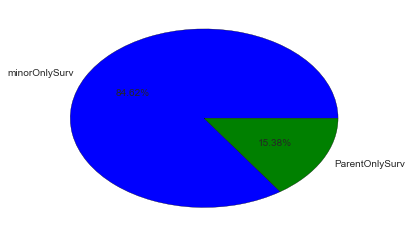

In [31]:
#Minors survived but parents not survived
minors_1_parent_0 = pd.DataFrame(columns=minors_all.columns)
#Minors not survived but parents survived
minors_0_parent_1 = pd.DataFrame(columns=titanic.columns)

for index1, row1 in minors_all.iterrows():
    exists = 'N'
    for index2, row2 in titanic.iterrows():
        #find parent by last name
        if (row1['Survived'] == 1 and 
            row2['Name'].split(',')[0] == row1['Name'].split(',')[0] and 
            row2['PassengerId'] <> row1['PassengerId'] and row2['Age'] >= 16 and
            row2['Parch'] <> 0 and row2['Survived'] == 0):
            
            minors_1_parent_0 = minors_1_parent_0.append(row1)
            
        elif (row1['Survived'] == 0 and 
            row2['Name'].split(',')[0] == row1['Name'].split(',')[0] and 
            row2['PassengerId'] <> row1['PassengerId'] and row2['Age'] >= 16 and
            row2['Parch'] <> 0 and row2['Survived'] == 1):
            if  (minors_0_parent_1['PassengerId'] == row2['PassengerId']).any():
                None
            else:
                minors_0_parent_1 = minors_0_parent_1.append(row2)
            
print '###  Minors Survived, but parent/s not survived   ###'
print minors_1_parent_0[['Name', 'Age']]
print '\n ###  Minors not survived, but parent/s survived  ###'
print minors_0_parent_1[['Name', 'Age']]
print '\n'
plt.pie([len(minors_1_parent_0), len(minors_0_parent_1)], labels=['minorOnlySurv', 'ParentOnlySurv'], autopct = '%.2f%%')
plt.show()

**The total number is not huge, Anyway I see children-only survival is too high compare to parent-only survival. I don't think we need to run any stat to proove this difference after seeing above data. This is exactly what I expected. I still see one Age in seconds set (parents) is 17, I think she couldn't be considered to be a parent, this can be fixed by applying more precise rules into code to estimate children and parents.**

## Limitations on Analysis:
1. We can't strongly rely on analysis based on Age as we have it missing for 20% of passengers.
2. This is only data of 891 passengers out of 2300 on board. We can't conclude results with confidence % unless we perform t stat.
3. If Parent/Children and Sibling/spouse coulmns would have split, it would have helped more accurate analysis on 3rd question.
4. Most of the results are correlation, but there is chance of a cause for class vs surivavl result as explained there. (Ex: low survival in 3rd class due to this class is located in lower level and couldn't reach life boats)